# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# Mounting Gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing neccessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading the dataset
df = pd.read_csv('/content/drive/MyDrive/Copy of SeoulBikeData.csv', encoding = "ISO-8859-1", engine='python')

**DATA** **INSPECTION**

In [4]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

*   As we can there is not a single null value in our dataset

In [7]:
# Converting Date column into datetime
df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y')

In [8]:
# Extracting month year day from the Date column
df['Month'] = df['Date'].dt.month
df['Year']  = df['Date'].dt.year 
df['Day']   = df['Date'].dt.day

In [9]:
# Droping Year and Date column as we won't be needing them 
df.drop('Year',axis=1,inplace = True)
df.drop('Date',axis=1,inplace = True)

In [10]:
# Converting the dtype into 'category'
df['Month'] = df['Month'].astype('category') 
df['Hour']  = df['Hour'].astype('category') 
df['Day']   = df['Day'].astype('category') 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rented Bike Count          8760 non-null   int64   
 1   Hour                       8760 non-null   category
 2   Temperature(°C)            8760 non-null   float64 
 3   Humidity(%)                8760 non-null   int64   
 4   Wind speed (m/s)           8760 non-null   float64 
 5   Visibility (10m)           8760 non-null   int64   
 6   Dew point temperature(°C)  8760 non-null   float64 
 7   Solar Radiation (MJ/m2)    8760 non-null   float64 
 8   Rainfall(mm)               8760 non-null   float64 
 9   Snowfall (cm)              8760 non-null   float64 
 10  Seasons                    8760 non-null   object  
 11  Holiday                    8760 non-null   object  
 12  Functioning Day            8760 non-null   object  
 13  Month                      8760 n

# *EDA(Exploratory Data Analysis)*

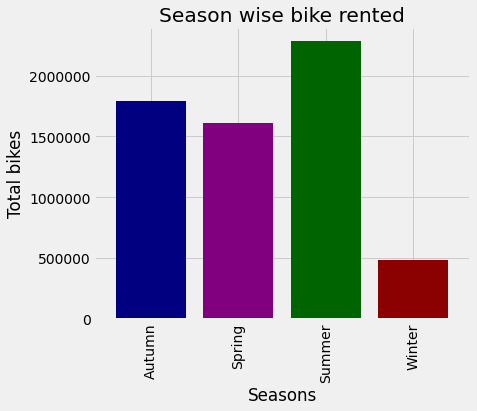

In [12]:
# let's see Number of bikes rented season wise
season_wise_bike = df.groupby(['Seasons'])['Rented Bike Count'].sum()
plt.style.use('fivethirtyeight')
plt.figure(figsize=(6,5))
color = ['navy','purple','darkgreen','darkred']
season_wise_bike.plot(kind='bar',color = color,width = 0.80)
plt.title('Season wise bike rented')
plt.ylabel('Total bikes')
plt.xlabel('Seasons')
plt.ticklabel_format( style='plain',axis ='y')

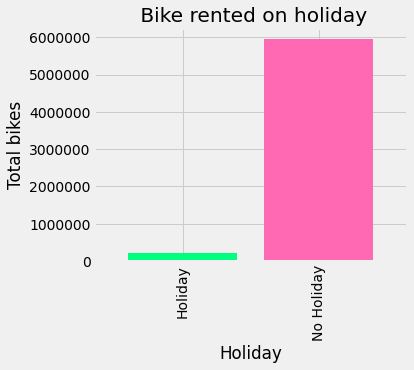

In [13]:
# let's see number of bikes rented on holidays
Holiday = df.groupby(['Holiday'])['Rented Bike Count'].sum()
plt.figure(figsize=(5,4))
plt.style.use('fivethirtyeight')
color = ['springgreen','hotpink',]
Holiday.plot(kind='bar',color = color,width = 0.80)
plt.title(' Bike rented on holiday')
plt.ylabel('Total bikes')
plt.ticklabel_format( style='plain',axis ='y')

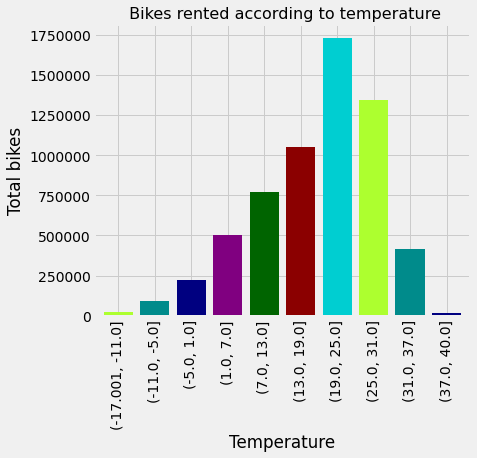

In [14]:
# let's Bikes rented according to temperature
bins = [-17,-11,-5,1,7,13,19,25,31,37,40]
temperature_wise = df.groupby(pd.cut(df['Temperature(°C)'], bins=bins,include_lowest=True))['Rented Bike Count'].sum()
plt.style.use('fivethirtyeight')
plt.figure(figsize=(6,5))
color = ['greenyellow','darkcyan','navy','purple','darkgreen','darkred','darkturquoise']
temperature_wise.plot(kind='bar',color = color,width = 0.80)
plt.title(' Bikes rented according to temperature',fontsize = 16)
plt.ylabel('Total bikes')
plt.xlabel('Temperature')
plt.ticklabel_format( style='plain',axis ='y')

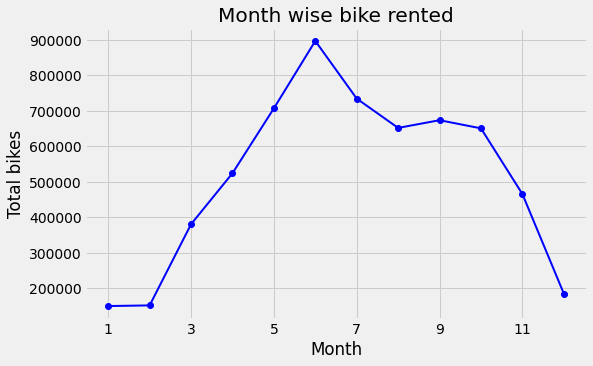

In [15]:
# let's see monthly trend of bikes rented
month_wise = df.groupby('Month')['Rented Bike Count'].sum()
plt.figure(figsize=(8,5))
plt.style.use('fivethirtyeight')
month_wise.plot(color = 'b',linewidth = 2,marker = 'o')
plt.title('Month wise bike rented')
plt.ylabel('Total bikes')
plt.xlabel('Month')
plt.ticklabel_format( style='plain',axis ='y')

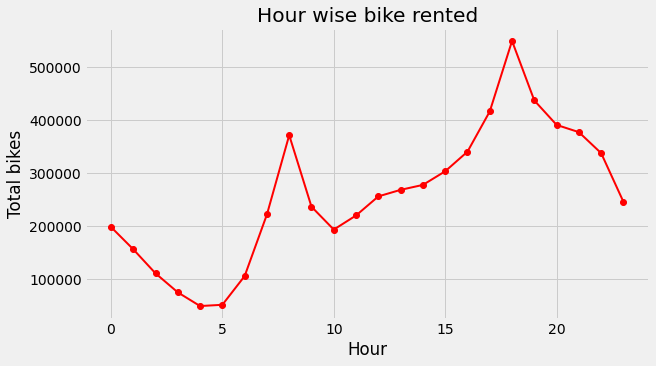

In [16]:
# let's see peak hours 
hour_wise = df.groupby(['Hour'])['Rented Bike Count'].sum()
plt.figure(figsize=(9,5))
plt.style.use('fivethirtyeight')
hour_wise.plot(color = 'r',linewidth = 2,marker = 'o')
plt.title('Hour wise bike rented')
plt.ylabel('Total bikes')
plt.xlabel('Hour')
plt.ticklabel_format( style='plain',axis ='y')

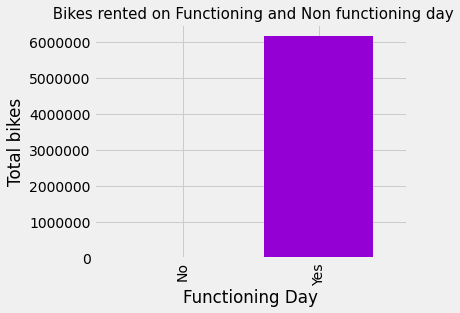

In [17]:
functioning_day = df.groupby(['Functioning Day'])['Rented Bike Count'].sum()
plt.figure(figsize=(5,4))
plt.style.use('fivethirtyeight')
color = ['springgreen','darkviolet',]
functioning_day.plot(kind='bar',color = color,width = 0.80)
plt.title(' Bikes rented on Functioning and Non functioning day',fontsize = 15)
plt.ylabel('Total bikes')
plt.ticklabel_format( style='plain',axis ='y')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


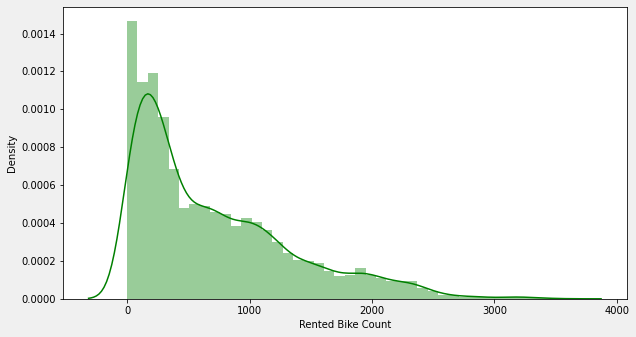

In [18]:
# let's see the distribution of our target variable
plt.figure(figsize=(9,5))
plt.style.use('default')
sns.distplot(df['Rented Bike Count'],color = 'g')


> **As we can clearly see that our target variable is right skewed so we will normalise the distribution**


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


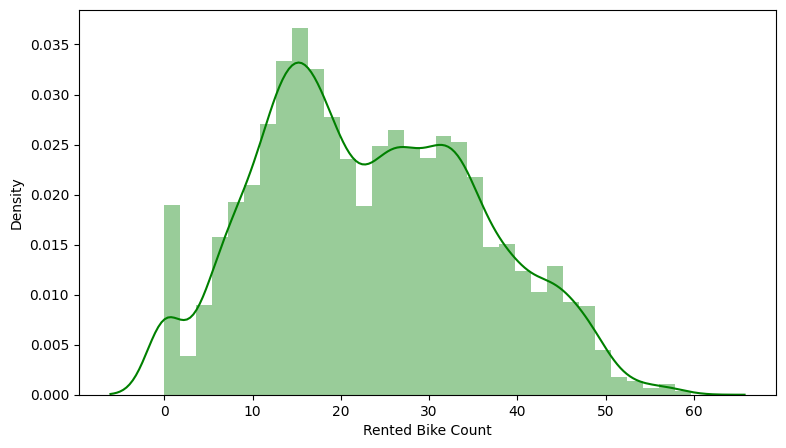

In [19]:
# Normalizing the dependent variable by square root
plt.figure(figsize=(9,5))

sns.distplot(np.sqrt(df['Rented Bike Count']),color = 'g')

In [20]:
# Numerical columns of our dataset
numerical_features = list(df.describe().columns)
numerical_features

['Rented Bike Count',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

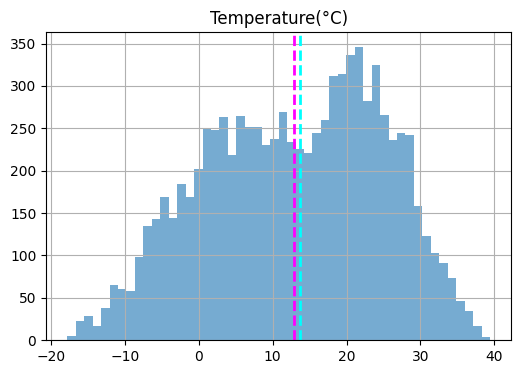

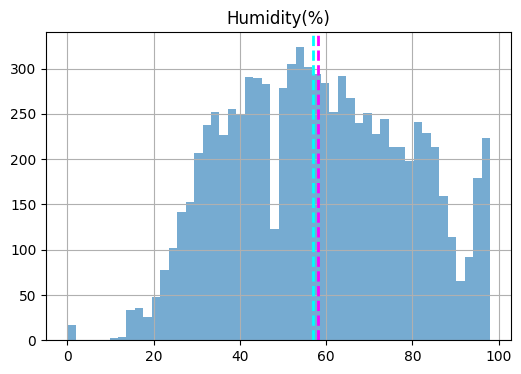

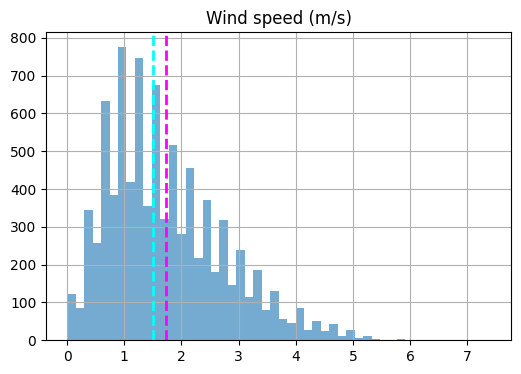

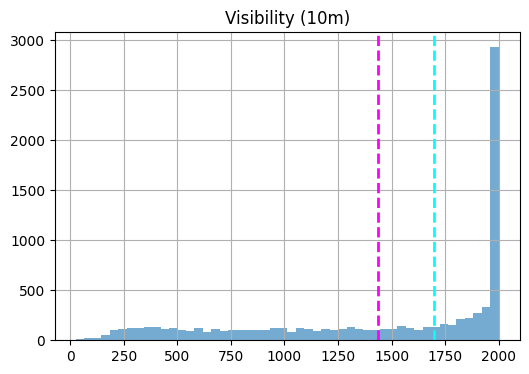

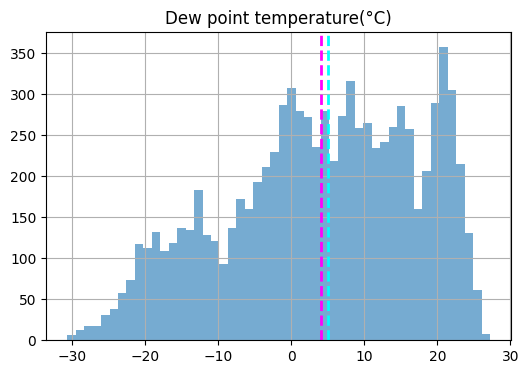

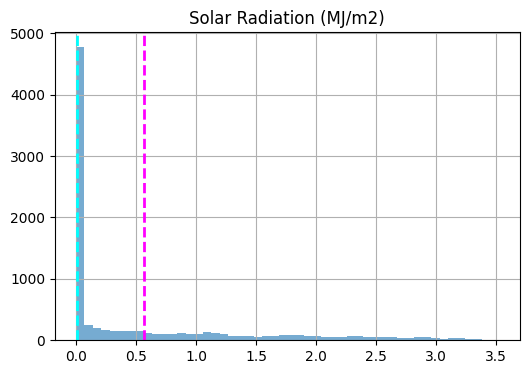

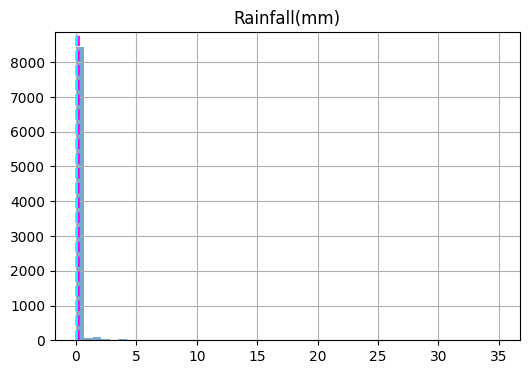

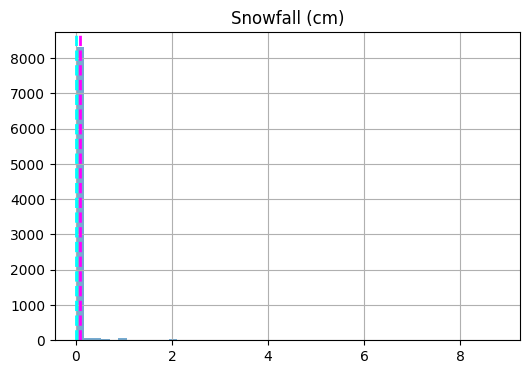

In [21]:
# Plotting histogram for each numerical column
plt.style.use('default')
for col in numerical_features[1:]:
    fig = plt.figure(figsize=(6,4))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax, alpha = 0.61)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

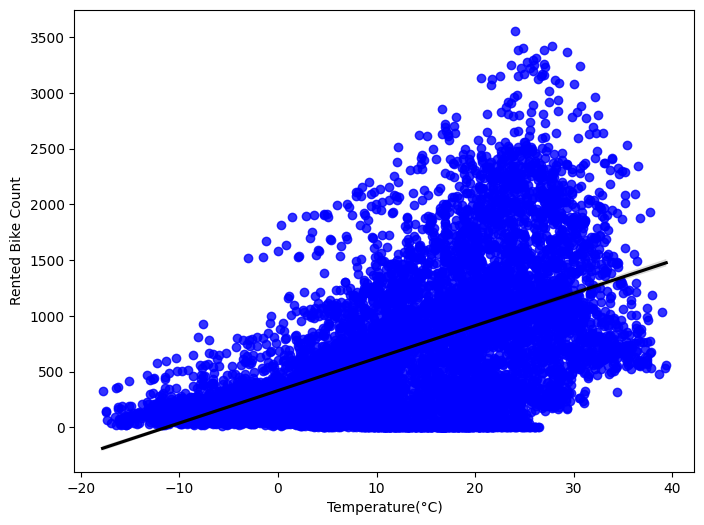

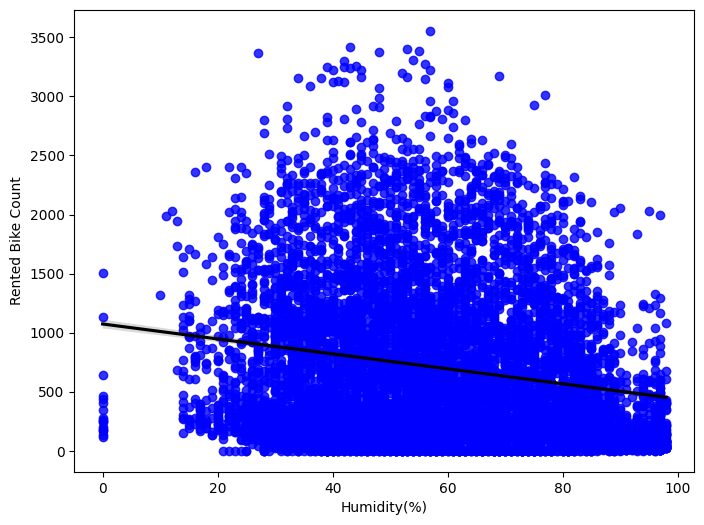

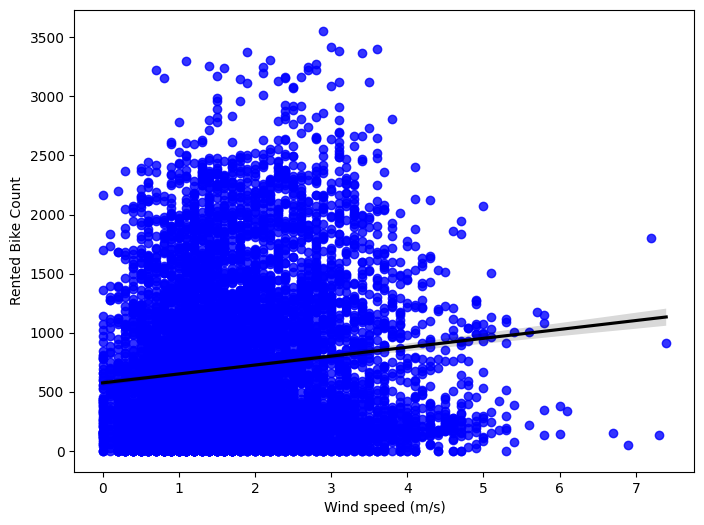

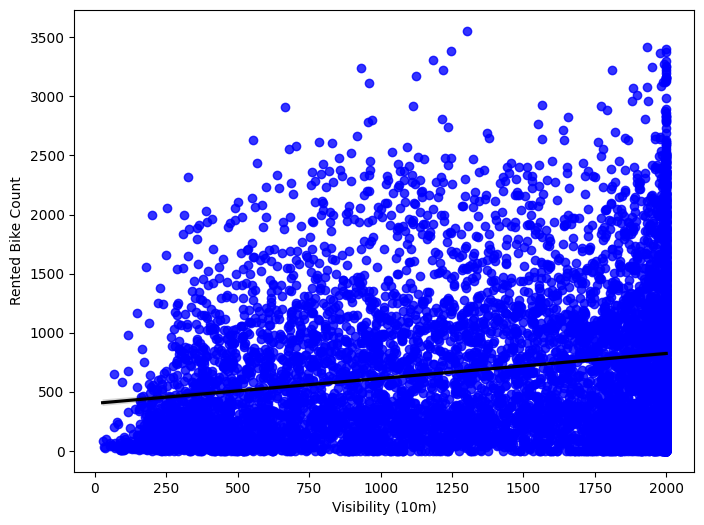

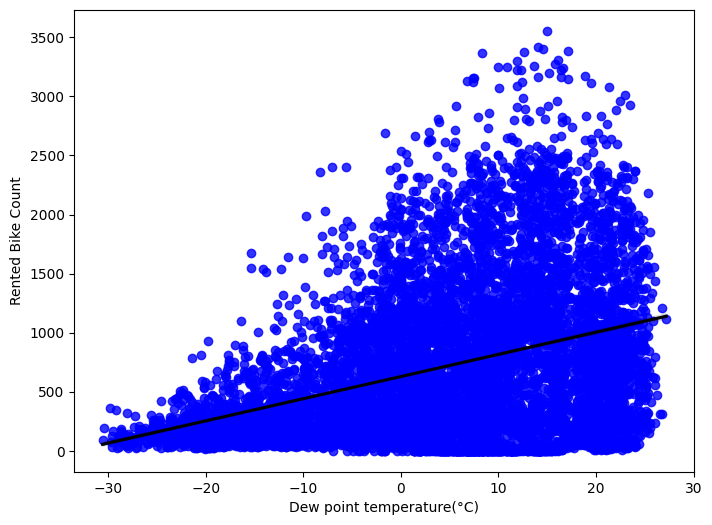

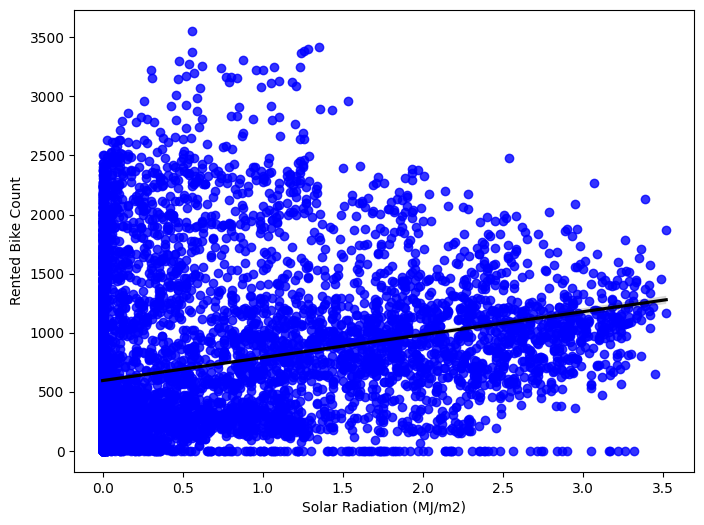

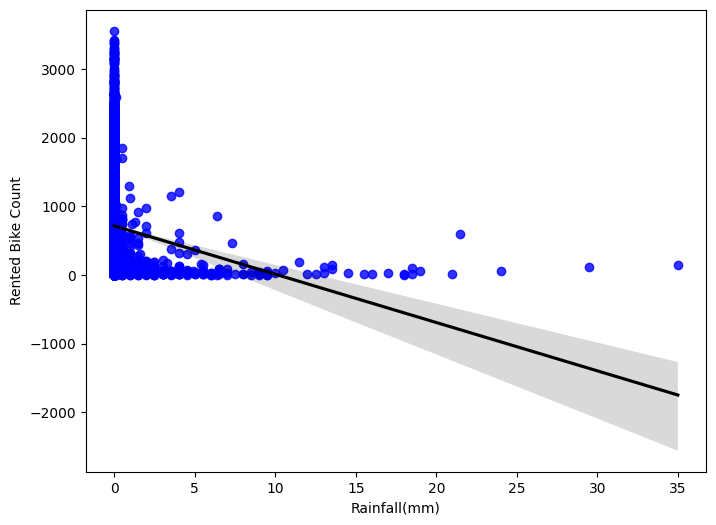

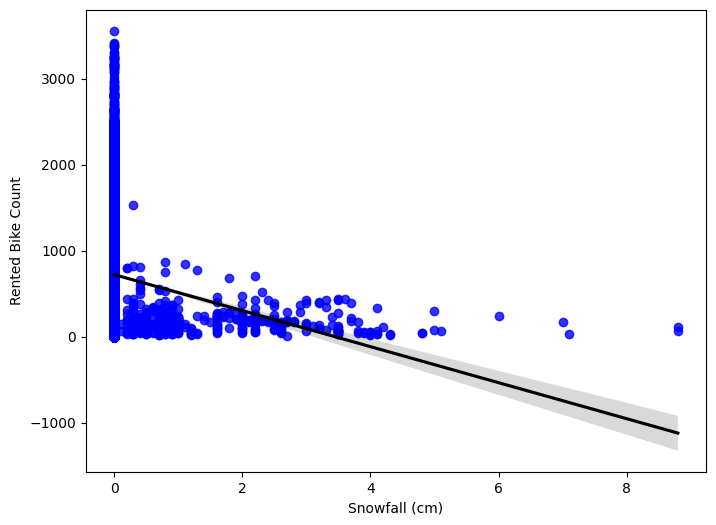

In [22]:
# plotting regression plot to analysis linear relationship 
for col in numerical_features[1:]:
  fig,ax=plt.subplots(figsize=(8,6))
  sns.regplot(x=df[col],y=df['Rented Bike Count'],scatter_kws={"color": 'b'}, line_kws={"color": "black"})

# From above regression plot we find out that -:


1.   The columns Temperature, Wind_speed, Visibility, Dew_point_temperature, Solar_Radiation has a positive relation with the dependent varialble 

2.   Whereas columns Rainfall, Snowfall, Humidity has anegative realtion with the dependent variable


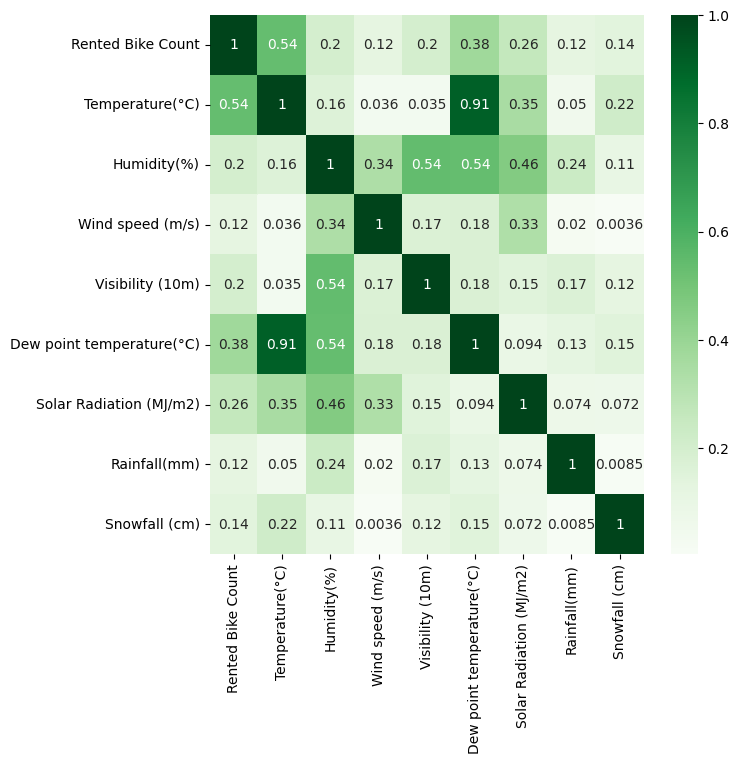

In [23]:
#  Checking correlation 
plt.figure(figsize=(7,7))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap="Greens")

--> In the above correlation heatmap we saw that Temperature and dew piont temperature are highly correlated so we need to either combine them or drop one of them


In [24]:
# Droping Dew point temperature column
df.drop('Dew point temperature(°C)',axis=1,inplace = True)

# Creating copy of our dataset

In [25]:
# copy of the dataset
df_copy = df.copy()


In [26]:
df_copy.head().T

,0,1,2,3,4
Rented Bike Count,254,204,173,107,78
Hour,0,1,2,3,4
Temperature(°C),-5.2,-5.5,-6.0,-6.2,-6.0
Humidity(%),37,38,39,40,36
Wind speed (m/s),2.2,0.8,1.0,0.9,2.3
Visibility (10m),2000,2000,2000,2000,2000
Solar Radiation (MJ/m2),0.0,0.0,0.0,0.0,0.0
Rainfall(mm),0.0,0.0,0.0,0.0,0.0
Snowfall (cm),0.0,0.0,0.0,0.0,0.0
Seasons,Winter,Winter,Winter,Winter,Winter


## Creating the dummy variables 

In [27]:
# One Hot Encoding
df_copy = pd.get_dummies(df_copy, columns=['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'Month', 'Day'],
                                            drop_first = True )

# **MODEL TRAINING**

In [28]:
# Creating Independent(X) and Dependent(Y) Variables
X  = df_copy.drop(columns=['Rented Bike Count'], axis=1)
Y = np.sqrt(df_copy['Rented Bike Count'])

**TRAIN TEST SPLIT**

In [29]:
# Splitting the data into Training and Testing set
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split( X,Y , test_size = 0.2, random_state = 0) 

In [30]:
print(X_train.shape)
print(X_test.shape)

(7008, 76)
(1752, 76)


In [31]:
print(Y_train.shape)
print(Y_test.shape)

(7008,)
(1752,)


# **LINEAR REGRESSION**

In [32]:
# Fitting Linear Regression model on training set
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, Y_train)

In [33]:
# Checking regression score
reg.score(X_train,Y_train)

0.7755895991172163

In [34]:
reg.coef_

array([ 5.20093518e-01, -1.21317908e-01, -1.46985634e-02,  1.23928710e-03,
        8.68681369e-01, -1.48961787e+00, -3.32748957e-02, -1.87331065e+00,
       -4.85355075e+00, -7.16284684e+00, -9.44394911e+00, -9.07760366e+00,
       -4.01213718e+00,  2.28202023e+00,  7.59150379e+00,  1.42485851e+00,
       -3.07709310e+00, -3.36204875e+00, -2.62684646e+00, -2.84235078e+00,
       -2.89189820e+00, -1.83032044e+00,  1.74848374e-01,  3.85707036e+00,
        1.03319308e+01,  6.78559855e+00,  6.04210287e+00,  6.34968503e+00,
        5.14497654e+00,  1.57615692e+00, -4.57519605e+09, -1.58198657e+10,
       -9.59535655e+09,  3.35751575e+00,  2.82998004e+01, -8.81450653e-01,
       -5.02016050e+09, -5.02016050e+09, -5.02016049e+09,  6.22450914e+09,
        6.22450914e+09,  6.22450914e+09, -9.59535654e+09, -9.59535654e+09,
       -9.59535654e+09,  1.98908424e+00, -1.42817211e+00, -1.76428795e-01,
        8.63785744e-02, -1.47945988e+00,  1.34981441e+00,  6.15571141e-01,
       -7.52436399e-01,  

In [35]:
reg.intercept_

9595356534.275204

In [37]:
# Testing the model on test set 
Y_pred = reg.predict(X_test)

In [38]:
# Evaluating the model performance by some evaluating metrics
from sklearn.metrics import mean_squared_error
MSE  = mean_squared_error((Y_test), (Y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 34.34238117716619
RMSE : 5.860237297001393


In [39]:
# Checking R2 scores of the model
from sklearn.metrics import r2_score
r2 = r2_score((Y_test), (Y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((Y_test), (Y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.7819341078220347
Adjusted R2 :  0.7720397748038106


***We see that the R2 score for the test data is 0.781 that means that our Linear regression model is performing on the data  ***

# **LASSO REGRESSION**

In [40]:
# Fitting the Lasso model on the test set
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, Y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [41]:
# Checking Lasso score
lasso.score(X_train, Y_train)

0.7755894646852208

In [42]:
# Applying Cross validation 
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.805e+04, tolerance: 8.747e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.461e+04, tolerance: 8.603e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [43]:
# Testing the model on Test set
y_pred_lasso = lasso_regressor.predict(X_test)

In [44]:
# Evaluating the model performance by some evaluating metrics
MSE  = mean_squared_error(10**(Y_test), 10**(y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((Y_test), (y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((Y_test), (y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 8.36413443849994e+111
RMSE : 9.145564191727014e+55
R2 : 0.7819921643127213
Adjusted R2 :  0.7721004654994479


**For LASSO Regression the R2 score for the test set is 0.781 that means our model is performing well**

# **RIDGE REGRESSION**

In [45]:
# Fitting RIDGE Regression model on the training set
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.41063e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.3457e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.46197e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.45509e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditi

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [46]:
# Testing the model on test set 
y_pred_ridge = ridge_regressor.predict(X_test)

In [47]:
# Evaluating the model performance by  evaluation metrics
MSE  = mean_squared_error((Y_test), (y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((Y_test), (y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((Y_test), (y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 34.351035959161294
RMSE : 5.860975683208496
R2 : 0.7818791520300168
Adjusted R2 :  0.7719823254952594


***R2 score of 0.78 that means that RIDGE Regression model is performing well on the data ***

# **ELASTICNET*

In [48]:
# Fitting Elastic net model on training set
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticnet.fit(X_train,Y_train)

ElasticNet(alpha=0.1)

In [49]:
# Checking Elastic net score
elasticnet.score(X_train, Y_train)

0.6271528045679116

In [50]:
# Testing the model on test set
y_pred_en = elasticnet.predict(X_test)

In [51]:
# Evaluating model performance by evaluation metrics
MSE  = mean_squared_error((Y_test), (y_pred_en))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((Y_test), (y_pred_en))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((Y_test), (y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 59.93427140467877
RMSE : 7.74172276723203
R2 : 0.619431736591771
Adjusted R2 :  0.6021641616550395


**R2 score for ELASTIC NET model is 0.619 that means the model is performing decently on the data**

# **DECISION* TREE*

In [52]:
# Fitting the DECISION TREE model on the training set
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [53]:
# Checking the score 
decision_regressor.score(X_train,Y_train)

0.5742882418254232

In [54]:
# Testing the model on test set
y_pred_dt = decision_regressor.predict(X_test)

In [55]:
# Evaluating model performance by evaluation metrics
MSE  = mean_squared_error((Y_test), (y_pred_dt))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((Y_test), (y_pred_dt))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((Y_test), (y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 81.111265313643
RMSE : 9.006179285004436
R2 : 0.4849628991928062
Adjusted R2 :  0.6021641616550395


**R2 score for DECISION TREE model is 0.484 that means the model is not performing well on the data**

# **RANDOM FOREST**